In [2]:
from PIL import Image
import numpy as np
import os

In [3]:
img = Image.open(os.path.join("data", "img_cat.jpeg"))

In [7]:
img.size

(1185, 1481)

In [6]:
I = np.array(img)

In [ ]:
import matplotlib.pyplot as plt

In [15]:
I.shape

(1481, 1185, 3)

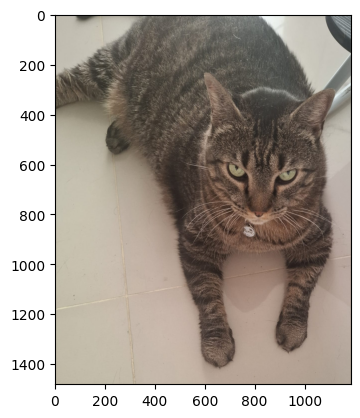

In [10]:
plt.imshow(I)   

In [17]:
I[:,:,0] = 0

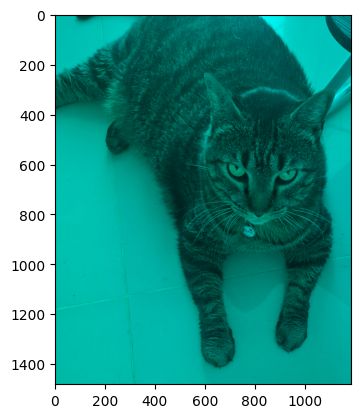

In [18]:
plt.imshow(I)

In [24]:
I[:,:,2] = 0

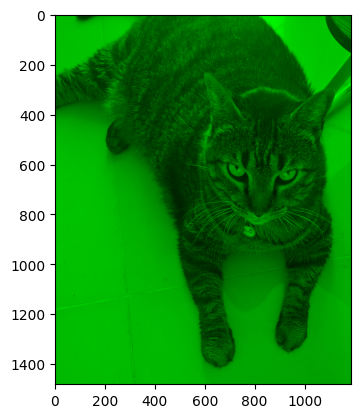

In [25]:
plt.imshow(I)

In [63]:
Ig = I[:,:,1]

In [64]:
Ig.shape

(1481, 1185)

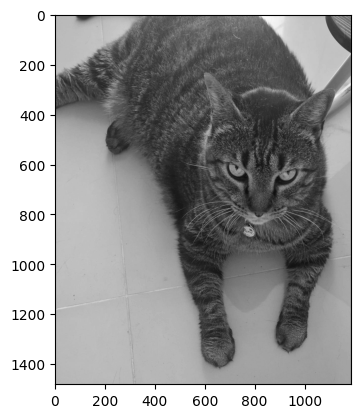

In [65]:
plt.imshow(Ig, cmap='gray')

In [66]:
Ig = (np.maximum(Ig.astype(np.float32)-50, 0)).astype(np.uint8)

In [67]:
Igflat = Ig.flatten()

(array([1.02842e+05, 1.92450e+04, 2.05950e+04, 2.17800e+04, 2.22950e+04,
        2.34200e+04, 2.42050e+04, 2.54250e+04, 2.57630e+04, 2.64850e+04,
        2.74940e+04, 2.79400e+04, 2.79450e+04, 2.80950e+04, 2.76710e+04,
        2.77540e+04, 2.66910e+04, 2.59930e+04, 2.51020e+04, 2.40930e+04,
        2.31720e+04, 2.16230e+04, 2.08660e+04, 1.97460e+04, 1.86510e+04,
        2.57540e+04, 1.60100e+04, 1.48790e+04, 1.43060e+04, 1.39700e+04,
        1.33570e+04, 1.32860e+04, 1.26030e+04, 1.23470e+04, 1.19540e+04,
        1.10520e+04, 1.06940e+04, 1.03750e+04, 1.00970e+04, 9.34900e+03,
        9.17400e+03, 9.44700e+03, 9.10400e+03, 9.19500e+03, 9.36200e+03,
        9.06400e+03, 9.09900e+03, 8.99600e+03, 8.86700e+03, 9.59200e+03,
        1.63490e+04, 1.27400e+04, 1.51590e+04, 2.33630e+04, 3.49770e+04,
        3.66600e+04, 3.71500e+04, 2.06380e+04, 1.82090e+04, 1.78800e+04,
        1.98750e+04, 2.29550e+04, 2.71030e+04, 2.78290e+04, 3.07510e+04,
        5.22100e+04, 4.64580e+04, 7.21730e+04, 7.40

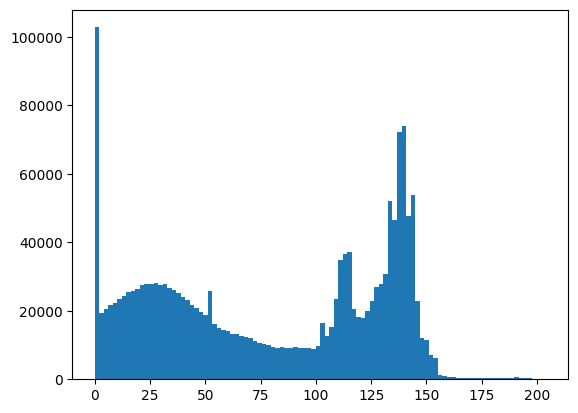

In [68]:
plt.hist(Igflat, bins=100)

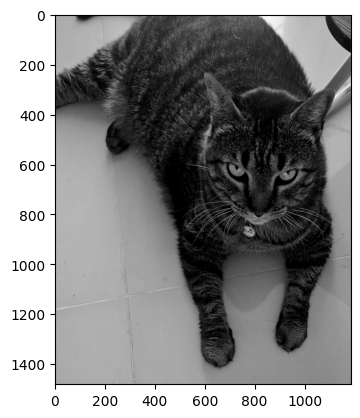

In [69]:
plt.imshow(Ig, cmap='gray')